In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import seaborn as sns
import os
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
#from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import randint
#from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
import numpy as np


ModuleNotFoundError: No module named 'catboost'

In [206]:
# Retrieve path and load the data
path = os.getcwd()
dr = pd.read_csv(path+"/train.csv")
dt = pd.read_csv(path+"/test.csv")

# Number of rows and columns
print('dr train', dr.shape)
print('df test', dt.shape)

dt.head(3)

dr train (6895, 70)
df test (767, 69)


,id,short_name,overall,potential,value_eur,wage_eur,birthday_date,height_cm,weight_kg,club_name,league_name,league_level,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_name,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,215562,R. Hunt,63,63,475000.0,3000,1995-07-07,171,67,Swindon Town,English League Two,4,24,NaN,2019-06-24,2022,England,NaN,Right,5,2,1,High/Medium,Normal (170-185),No,831000.0,NaN,NaN,76.0,33.0,55.0,64.0,56.0,62.0,62,29,50,57,23,61,62,55,51,59,74,77,84,55,88,45,84,80,55,28,51,57,51,44,36,57,54,59,58,15,12,12,11,15,NaN
1,248311,Tiri,64,64,500000.0,950,1991-07-14,186,84,ATK Mohun Bagan FC,Indian Super League,1,44,NaN,2020-09-12,2023,Spain,NaN,Left,3,2,1,Medium/Medium,Normal (185+),No,675000.0,NaN,"Leadership, Power Header",65.0,38.0,53.0,52.0,62.0,78.0,60,28,62,56,55,53,31,35,57,50,64,66,52,59,45,56,88,74,83,38,66,59,43,48,33,55,63,63,64,9,14,9,11,6,NaN
2,223933,G. Nilsson,64,70,925000.0,2000,1997-05-23,197,87,SV Wehen Wiesbaden,German 3. Bundesliga,3,29,NaN,2021-01-05,2023,Sweden,NaN,Right,2,2,1,Medium/Medium,Lean (185+),No,1500000.0,NaN,Injury Prone,77.0,62.0,48.0,59.0,27.0,71.0,35,63,68,56,61,61,47,38,44,62,73,80,44,59,48,67,50,69,79,56,59,20,60,53,65,55,23,25,19,6,7,8,16,14,NaN


In [207]:
# Create column to differentiate train from test
dr['is_test'] = 0
dt['is_test'] = 1
# union both datasets
df = pd.concat([dr, dt])
# Unit test
dr.shape[0] + dt.shape[0] == df.shape[0]
# Unit test
df['is_test'].value_counts()

0    6895
1     767
Name: is_test, dtype: int64

In [208]:
df.columns

Index(['id', 'short_name', 'overall', 'potential', 'value_eur', 'wage_eur',
       'birthday_date', 'height_cm', 'weight_kg', 'club_name', 'league_name',
       'league_level', 'club_jersey_number', 'club_loaned_from', 'club_joined',
       'club_contract_valid_until', 'nationality_name', 'nation_jersey_number',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'player_traits', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'pow

## Dealing with NA

In [209]:
# Function to create table of missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

                # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [210]:
# Check the NAs
print(missing_values_table(df))

Your selected dataframe has 71 columns.
There are 15 columns that have missing values.
                      Missing Values  % of Total Values
club_loaned_from                7266               94.8
nation_jersey_number            7198               93.9
goalkeeping_speed               6961               90.9
player_tags                     6806               88.8
player_traits                   2874               37.5
position                         767               10.0
pace                             701                9.1
shooting                         701                9.1
passing                          701                9.1
dribbling                        701                9.1
defending                        701                9.1
physic                           701                9.1
release_clause_eur               401                5.2
club_joined                      396                5.2
value_eur                          5                0.1


In [211]:
columns_to_drop = ['club_loaned_from', 'nation_jersey_number', 'player_tags']
df = df.drop(columns=columns_to_drop)

In [212]:
# Function to impute NA with 0
def impute_column_with_zero(df, column_name):
    df[column_name] = df[column_name].fillna(0)
    return df

df = impute_column_with_zero(df, 'goalkeeping_speed')

In [213]:
# Check the NAs
print(missing_values_table(df))

Your selected dataframe has 68 columns.
There are 11 columns that have missing values.
                    Missing Values  % of Total Values
player_traits                 2874               37.5
position                       767               10.0
pace                           701                9.1
shooting                       701                9.1
passing                        701                9.1
dribbling                      701                9.1
defending                      701                9.1
physic                         701                9.1
release_clause_eur             401                5.2
club_joined                    396                5.2
value_eur                        5                0.1


Ideas, what to do with variables:
short_name - drop
birthday_date - calculate age
club_name - drop
league_name - edrop
nationality_name - dummies - but it's not good for RandomForest - drop
club_joined - calculate number of years in club
preffered_foot - dummy
real_face - dummy - but will drop it from the features
work_rate - find unique values - label encoding for the words before '/' and after 
body_type - find unique values of type (befor parenthesis) and create dummies
player_traits - get unique values and create dummies

In [214]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)

# Display the DataFrame
print(df.head(1))

       id short_name  overall  potential  value_eur  wage_eur birthday_date  \
0  216302  E. García       71         71  1400000.0     10000    1989-12-28   

   height_cm  weight_kg                  club_name      league_name  \
0        176         73  Club Atlético de San Luis  Mexican Liga MX   

   league_level  club_jersey_number club_joined  club_contract_valid_until  \
0             1                  29  2021-07-12                       2026   

  nationality_name preferred_foot  weak_foot  skill_moves  \
0           Mexico          Right          5            3   

   international_reputation    work_rate         body_type real_face  \
0                         1  Medium/High  Normal (170-185)        No   

   release_clause_eur  player_traits  pace  shooting  passing  dribbling  \
0           2400000.0  Early Crosser  70.0      52.0     60.0       70.0   

   defending  physic  attacking_crossing  attacking_finishing  \
0       67.0    66.0                  64               

In [215]:
# Calculate age of players
df['birthday_date'] = pd.to_datetime(df['birthday_date'], format='%Y-%m-%d', errors='coerce')
df['today'] = pd.to_datetime('2022-11-01',format='%Y-%m-%d', errors='coerce')


df['age'] = ((df['today'] - df['birthday_date'])/np.timedelta64(1, 'Y'))
df['age'] = df['age'].astype(int)

In [216]:
# Calculate the number of years in the club
df['club_joined'] = pd.to_datetime(df['club_joined'], format='%Y-%m-%d', errors='coerce')
df['today'] = pd.to_datetime('2022-11-01', format='%Y-%m-%d', errors='coerce')

# Calculate the years_in_club only if 'club_joined' is not NA
df['years_in_club'] = np.where(df['club_joined'].notna(), ((df['today'] - df['club_joined']) / np.timedelta64(1, 'Y')), np.nan)
df['years_in_club'] = df['years_in_club'].astype(float).round(2)

# Drop the 'club_joined' column
df = df.drop('club_joined', axis=1)

In [217]:
# Specify the columns to impute
columns_to_impute = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'release_clause_eur', 'value_eur', 'years_in_club']

# Create a KNNImputer object with k=3 
imputer = KNNImputer(n_neighbors=3) 

# Perform KNN imputation only on the specified columns for the training data
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [218]:
# Check the NAs
print(missing_values_table(df))

Your selected dataframe has 70 columns.
There are 2 columns that have missing values.
               Missing Values  % of Total Values
player_traits            2874               37.5
position                  767               10.0


## Outliers and Unique Values

In [219]:
def plot_boxplots(data, variables, plots_per_row=2):
    num_variables = len(variables)
    num_rows = math.ceil(num_variables / plots_per_row)

    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(12, 4 * num_rows))
    fig.subplots_adjust(hspace=0.5)

    for i, variable in enumerate(variables):
        row, col = divmod(i, plots_per_row)
        ax = axes[row, col] if num_rows > 1 else axes[col]

        ax.boxplot(data[variable])
        ax.set_title(f'Boxplot of {variable}')
        ax.set_ylabel(variable)

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()

    plt.show()

In [220]:
num_vars = ['id',  'overall', 'potential', 'value_eur', 'wage_eur',
       'height_cm', 'weight_kg',
       'league_level', 'club_jersey_number', 
       'club_contract_valid_until',
       'weak_foot', 'skill_moves',
       'international_reputation', 
       'release_clause_eur', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']

non_num_vars = ['birthday_date', 'position', 'short_name', 'birthday_date', 'club_name', 'league_name', 'nationality_name', 'preferred_foot', 'work_rate', 'body_type', 'real_face', 'player_traits', ]

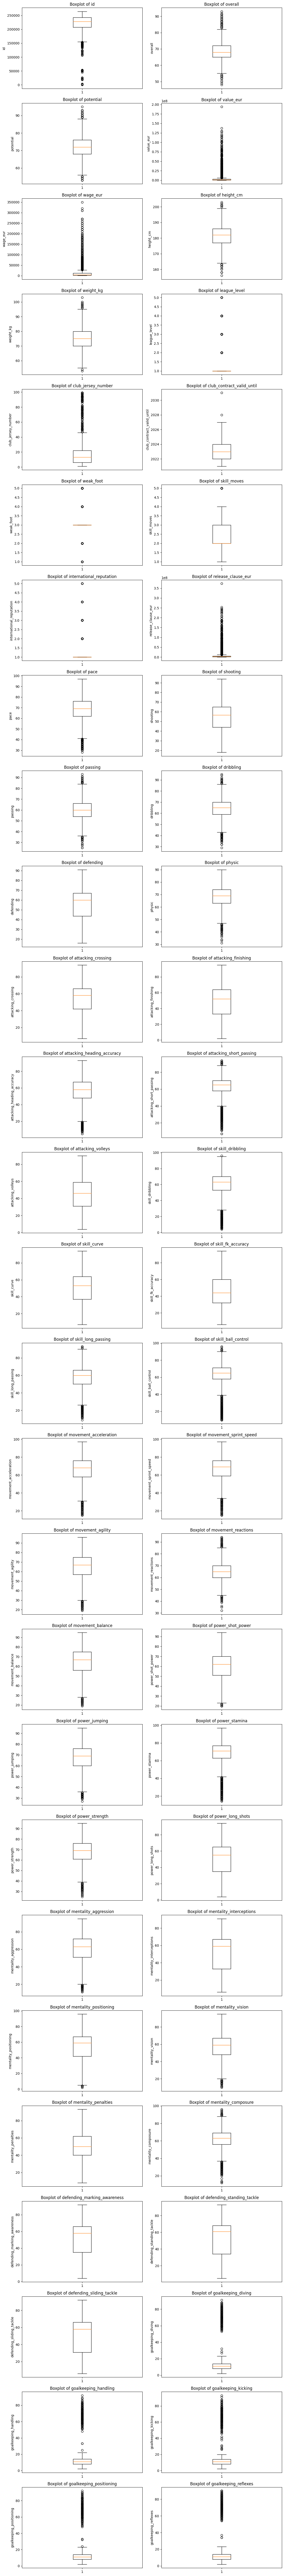

In [221]:
# Execute
columns = num_vars
plot_boxplots(df, columns, plots_per_row=2)

In [222]:
# Custom function to calculate the number of unique values for given columns
def calculate_unique_counts(dataframe, columns):
    unique_counts = {}
    for column in columns:
        unique_count = dataframe[column].nunique()
        unique_counts[column] = unique_count
    return unique_counts

# List of columns for which you want to calculate unique counts
columns_to_check = non_num_vars

# Calculate unique counts for the specified columns
unique_counts = calculate_unique_counts(df, columns_to_check)

# Print the results
for column, count in unique_counts.items():
    print(f"Number of unique values in {column}: {count}")

Number of unique values in birthday_date: 4214
Number of unique values in position: 24
Number of unique values in short_name: 7418
Number of unique values in club_name: 701
Number of unique values in league_name: 55
Number of unique values in nationality_name: 144
Number of unique values in preferred_foot: 2
Number of unique values in work_rate: 9
Number of unique values in body_type: 10
Number of unique values in real_face: 2
Number of unique values in player_traits: 825


In [223]:
# Unique values for strings
def calculate_value_counts(df, columns, top_n=10):
    
    for column in columns:
        # Calculate the count of each unique value
        value_counts = df[column].value_counts()

        # Calculate the percentage of each unique value
        percentage = (value_counts / len(df)) * 100

        # Create a new DataFrame to display the results
        result_df = pd.DataFrame({column: value_counts.index, 'Count': value_counts, 'Percentage': percentage})

        # Display the top values
        print(result_df.head(top_n))

# Example usage with multiple columns
columns = ['preferred_foot', 'work_rate', 'body_type', 'real_face']
calculate_value_counts(df, columns, top_n=10)

      preferred_foot  Count  Percentage
Right          Right   5779   75.424171
Left            Left   1883   24.575829
                   work_rate  Count  Percentage
Medium/Medium  Medium/Medium   3477   45.379796
High/Medium      High/Medium   1635   21.339076
Medium/High      Medium/High    944   12.320543
High/High          High/High    592    7.726442
High/Low            High/Low    326    4.254764
Medium/Low        Medium/Low    276    3.602193
Low/High            Low/High    217    2.832159
Low/Medium        Low/Medium    181    2.362307
Low/Low              Low/Low     14    0.182720
                         body_type  Count  Percentage
Normal (170-185)  Normal (170-185)   2758   35.995824
Normal (185+)        Normal (185+)   1810   23.623075
Lean (170-185)      Lean (170-185)   1400   18.271992
Lean (185+)            Lean (185+)    702    9.162099
Normal (170-)        Normal (170-)    276    3.602193
Stocky (170-185)  Stocky (170-185)    256    3.341164
Stocky (185+)        S

In [224]:
# Unique values for player_traits
columns = ['player_traits']
calculate_value_counts(df, columns, top_n=50)

                                                                                        player_traits  \
Speed Dribbler (AI)                                                               Speed Dribbler (AI)   
Power Header                                                                             Power Header   
Dives Into Tackles (AI)                                                       Dives Into Tackles (AI)   
Long Passer (AI)                                                                     Long Passer (AI)   
Long Shot Taker (AI)                                                             Long Shot Taker (AI)   
Injury Prone                                                                             Injury Prone   
Technical Dribbler (AI)                                                       Technical Dribbler (AI)   
Leadership                                                                                 Leadership   
Early Crosser                                          

## Correlations

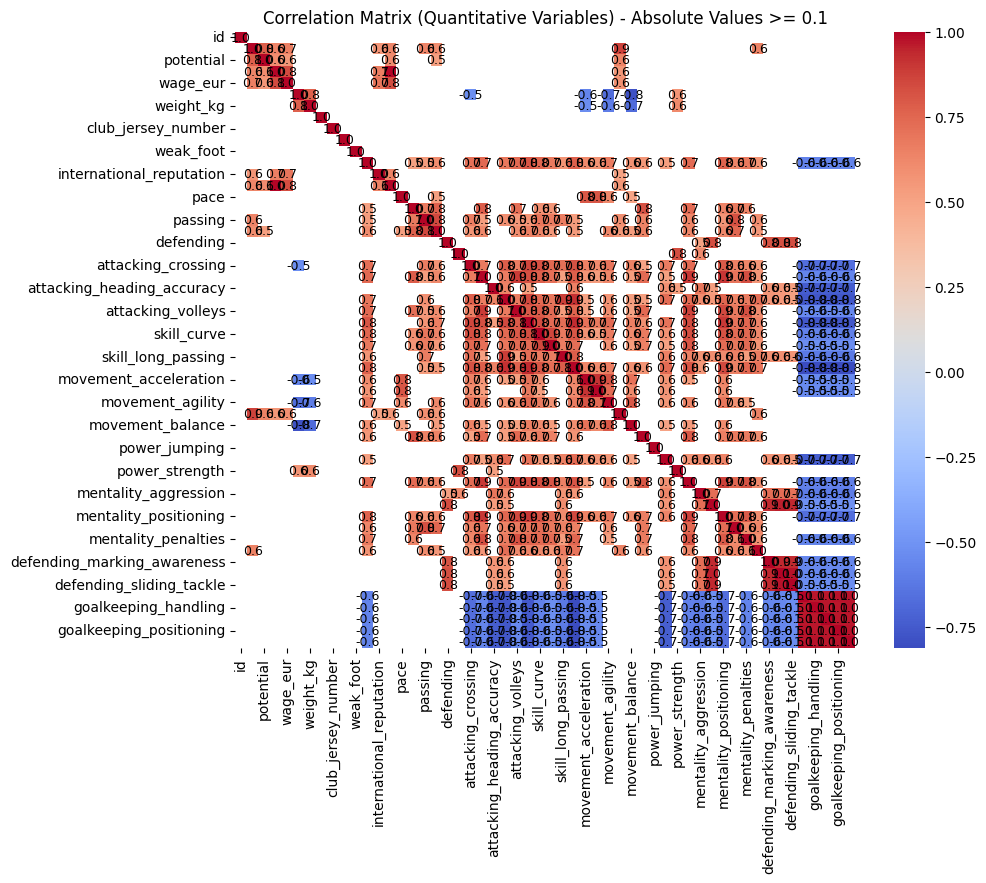

In [225]:
# Correlations among the variables with abs(correlation) >= 0.1
df_for_heatmap = df[['id',  'overall', 'potential', 'value_eur', 'wage_eur',
       'height_cm', 'weight_kg',
       'league_level', 'club_jersey_number', 
       'club_contract_valid_until',
       'weak_foot', 'skill_moves',
       'international_reputation', 
       'release_clause_eur', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]
df_for_heatmap_corr = df_for_heatmap.corr()

# Filter correlations with abs(correlation) >= 0.1
mask = (df_for_heatmap_corr.abs() >= 0.5)
df_for_heatmap_corr_filtered = df_for_heatmap_corr[mask]

# Plot correlations with adjusted font size and text color
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_for_heatmap_corr_filtered, annot=True, cmap='coolwarm', fmt=".1f", annot_kws={"size": 9, "color": "black"})
plt.title('Correlation Matrix (Quantitative Variables) - Absolute Values >= 0.1')
plt.show()

## Encoding

In [226]:
# Dealing with body_type
# body_type                                            
# Normal (170-185)  Normal (170-185)   1409   37.643601
# Lean (170-185)      Lean (170-185)    768   20.518301
# Normal (185+)        Normal (185+)    711   18.995458
# Lean (185+)            Lean (185+)    268    7.160032
# Normal (170-)        Normal (170-)    168    4.488378
# Stocky (170-185)  Stocky (170-185)    148    3.954048
# Lean (170-)            Lean (170-)     87    2.324339
# Unique                      Unique     76    2.030457
# Stocky (185+)        Stocky (185+)     73    1.950307
# Stocky (170-)        Stocky (170-)     35    0.935079
# As far as we already have height, we'll replace values with Normal/Lean/Stocky/Unique and then create dummies

# Replace values with the word before parenthesis
df['body_type'] = df['body_type'].str.extract(r'(\w+)\s*\(')

# Keep "Unique" if it is present in the original column
df.loc[df['body_type'].isna(), 'body_type'] = 'Unique'

# Display the resulting DataFrame
print(df.head())

       id   short_name  overall  potential  value_eur  wage_eur birthday_date  \
0  216302    E. García       71         71  1400000.0     10000    1989-12-28   
1  237867   D. Cancola       65         71  1000000.0      2000    1996-10-23   
2  253472      E. Kahl       65         77  1600000.0      2000    2001-09-27   
3  223994    S. Mugoša       72         72  2300000.0      5000    1992-02-26   
4  251635  A. Țigănașu       65         65   525000.0      3000    1990-06-12   

   height_cm  weight_kg                  club_name           league_name  \
0        176         73  Club Atlético de San Luis       Mexican Liga MX   
1        183         73             Ross County FC  Scottish Premiership   
2        178         69                  Aarhus GF      Danish Superliga   
3        188         81          Incheon United FC     Korean K League 1   
4        179         74                FC Botoşani       Romanian Liga I   

   league_level  club_jersey_number  club_contract_valid

In [227]:
# Function to create dummies
def one_hot(df, columns):
    dummy = pd.get_dummies(df[columns])
    encoded_df = pd.concat([df, dummy], axis=1)
    return encoded_df

# Columns to create dummies for
columns_to_encode = ['preferred_foot', 'body_type']

# Apply the one_hot function
df = one_hot(df, columns_to_encode)

# Drop the original columns after creating dummies
df = df.drop(columns=columns_to_encode)

# Display the resulting DataFrame
print(df.head())

       id   short_name  overall  potential  value_eur  wage_eur birthday_date  \
0  216302    E. García       71         71  1400000.0     10000    1989-12-28   
1  237867   D. Cancola       65         71  1000000.0      2000    1996-10-23   
2  253472      E. Kahl       65         77  1600000.0      2000    2001-09-27   
3  223994    S. Mugoša       72         72  2300000.0      5000    1992-02-26   
4  251635  A. Țigănașu       65         65   525000.0      3000    1990-06-12   

   height_cm  weight_kg                  club_name           league_name  \
0        176         73  Club Atlético de San Luis       Mexican Liga MX   
1        183         73             Ross County FC  Scottish Premiership   
2        178         69                  Aarhus GF      Danish Superliga   
3        188         81          Incheon United FC     Korean K League 1   
4        179         74                FC Botoşani       Romanian Liga I   

   league_level  club_jersey_number  club_contract_valid

In [228]:
# Dealing with work_rate                                      
# Medium/Medium Medium/Medium   1231   32.888058
# High/Medium      High/Medium   1005   26.850120
# Medium/High      Medium/High    511   13.652151
# High/High          High/High    409   10.927064
# High/Low            High/Low    215    5.744056
# Medium/Low        Medium/Low    170    4.541811
# Low/High            Low/High    118    3.152551
# Low/Medium        Low/Medium     76    2.030457
# Low/Low              Low/Low      8    0.213732
# Function to create "Attacking" and "Defensive" columns
def split_work_rate(df, column_name):
    # Split the values in the column by '/'
    split_values = df[column_name].str.split('/', expand=True)

    # Create new columns "Attacking" and "Defensive"
    df['Attacking'] = split_values[0]
    df['Defensive'] = split_values[1]

    # Drop the original "work_rate" column
    df = df.drop(column_name, axis=1)

    return df

# Apply the function to your DataFrame
df = split_work_rate(df, 'work_rate')

In [229]:
# Function for label encoding
def label_encode(df, columns):
    label_mapping = {'High': 3, 'Medium': 2, 'Low': 1}

    for column in columns:
        # Use map function to replace values based on the label_mapping dictionary
        df[column] = df[column].map(label_mapping)

    return df

# Apply label encoding to "Attacking" and "Defensive" columns
columns_to_encode = ['Attacking', 'Defensive']
df = label_encode(df, columns_to_encode)

# Display the resulting DataFrame
#print(df.head(1))


       id short_name  overall  potential  value_eur  wage_eur birthday_date  \
0  216302  E. García       71         71  1400000.0     10000    1989-12-28   

   height_cm  weight_kg                  club_name      league_name  \
0        176         73  Club Atlético de San Luis  Mexican Liga MX   

   league_level  club_jersey_number  club_contract_valid_until  \
0             1                  29                       2026   

  nationality_name  weak_foot  skill_moves  international_reputation  \
0           Mexico          5            3                         1   

  real_face  release_clause_eur  player_traits  pace  shooting  passing  \
0        No           2400000.0  Early Crosser  70.0      52.0     60.0   

   dribbling  defending  physic  attacking_crossing  attacking_finishing  \
0       70.0       67.0    66.0                  64                   40   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          56          

## Player Traits

In [230]:
# Function to remove (AI)

def remove_ai(df, column):
    df[column] = df[column].str.replace(r'\s*\([^)]*\)', '', regex=True)
    return df

# Column to process
column = 'player_traits'

# Apply the function
df = remove_ai(df, column)

# Display the resulting DataFrame
print(df.head())


       id   short_name  overall  potential  value_eur  wage_eur birthday_date  \
0  216302    E. García       71         71  1400000.0     10000    1989-12-28   
1  237867   D. Cancola       65         71  1000000.0      2000    1996-10-23   
2  253472      E. Kahl       65         77  1600000.0      2000    2001-09-27   
3  223994    S. Mugoša       72         72  2300000.0      5000    1992-02-26   
4  251635  A. Țigănașu       65         65   525000.0      3000    1990-06-12   

   height_cm  weight_kg                  club_name           league_name  \
0        176         73  Club Atlético de San Luis       Mexican Liga MX   
1        183         73             Ross County FC  Scottish Premiership   
2        178         69                  Aarhus GF      Danish Superliga   
3        188         81          Incheon United FC     Korean K League 1   
4        179         74                FC Botoşani       Romanian Liga I   

   league_level  club_jersey_number  club_contract_valid

In [231]:
# Ensure all values are strings and split each entry into a list of traits
traits_lists = [str(value).split(', ') if pd.notna(value) else [] for value in df['player_traits']]

# Flatten the list of lists
all_traits = [trait for sublist in traits_lists for trait in sublist]

# Create a set to get unique traits
unique_traits_set = set(all_traits)

# Convert the set to a list
unique_traits_list = list(unique_traits_set)

# Calculate the length of the list
list_length = len(unique_traits_list)

# Display the list of unique traits and its length
print("Unique Traits:", unique_traits_list)
print("Length of Unique Traits List:", list_length)





Unique Traits: ['Long Shot Taker', 'Chip Shot', 'Outside Foot Shot', 'Leadership', 'Flair', 'Speed Dribbler', 'One Club Player', 'Early Crosser', 'Dives Into Tackles', 'Team Player', 'Power Free-Kick', 'Injury Prone', 'Rushes Out Of Goal', 'Giant Throw-in', 'Comes For Crosses', 'Playmaker', 'Solid Player', 'Cautious With Crosses', 'Finesse Shot', 'Technical Dribbler', 'Long Passer', 'Saves with Feet', 'GK Long Throw', 'Power Header', 'Long Throw-in']
Length of Unique Traits List: 25


In [232]:
# Create dummy variables for each unique trait
for trait in unique_traits_list:
    df[trait] = df['player_traits'].apply(lambda x: 1 if trait in str(x) else 0)

# Display the resulting DataFrame
print(df.head())

       id   short_name  overall  potential  value_eur  wage_eur birthday_date  \
0  216302    E. García       71         71  1400000.0     10000    1989-12-28   
1  237867   D. Cancola       65         71  1000000.0      2000    1996-10-23   
2  253472      E. Kahl       65         77  1600000.0      2000    2001-09-27   
3  223994    S. Mugoša       72         72  2300000.0      5000    1992-02-26   
4  251635  A. Țigănașu       65         65   525000.0      3000    1990-06-12   

   height_cm  weight_kg                  club_name           league_name  \
0        176         73  Club Atlético de San Luis       Mexican Liga MX   
1        183         73             Ross County FC  Scottish Premiership   
2        178         69                  Aarhus GF      Danish Superliga   
3        188         81          Incheon United FC     Korean K League 1   
4        179         74                FC Botoşani       Romanian Liga I   

   league_level  club_jersey_number  club_contract_valid

## Standardisation

In [233]:
# Function to standardise values (but actually it doesn't change the accuracy of the model of ROC AUC)
def standardize(df, columns):
    for column in columns:
        df[column + '_standardized'] = (df[column] - df[column].mean()) / df[column].std()
        
    # Drop the original columns
    df.drop(columns=columns, inplace=True)
    return df

columns_to_standardize = ['value_eur', 'wage_eur', 'release_clause_eur']
df = standardize(df, columns_to_standardize)
df.columns.to_list()

['id',
 'short_name',
 'overall',
 'potential',
 'birthday_date',
 'height_cm',
 'weight_kg',
 'club_name',
 'league_name',
 'league_level',
 'club_jersey_number',
 'club_contract_valid_until',
 'nationality_name',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'real_face',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking_awarene

## Modelling

In [234]:
# Divide train and test datasets
df_train = df[df['is_test'] == 0]
df_test = df[df['is_test'] == 1]

In [235]:
# Check the shape
print(df_train.shape)
print(df_test.shape)

(6895, 100)
(767, 100)


In [236]:
# Check the columns
column_names = df.columns.tolist()
print(column_names)

['id', 'short_name', 'overall', 'potential', 'birthday_date', 'height_cm', 'weight_kg', 'club_name', 'league_name', 'league_level', 'club_jersey_number', 'club_contract_valid_until', 'nationality_name', 'weak_foot', 'skill_moves', 'international_reputation', 'real_face', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_slidi

In [237]:
# Create a list for feature columns
# drop 'id' 
lists = ['id', 'overall', 'potential', 'height_cm', 'weight_kg', 'club_jersey_number', 'club_contract_valid_until', 'weak_foot', 'skill_moves', 'international_reputation', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed', 'position', 'age', 'years_in_club', 'preferred_foot_Left', 'preferred_foot_Right', 'body_type_Lean', 'body_type_Normal', 'body_type_Stocky', 'body_type_Unique', 'Attacking', 'Defensive', 'Technical Dribbler', 'Early Crosser', 'Solid Player', 'Giant Throw-in', 'Saves with Feet', 'Long Passer', 'Injury Prone', 'Leadership', 'GK Long Throw', 'Chip Shot', 'Long Throw-in', 'Playmaker', 'Rushes Out Of Goal', 'Outside Foot Shot', 'Flair', 'Dives Into Tackles', 'Power Header', 'Comes For Crosses', 'Speed Dribbler', 'Power Free-Kick', 'Team Player', 'Cautious With Crosses', 'Long Shot Taker', 'One Club Player', 'Finesse Shot', 'value_eur_standardized', 'wage_eur_standardized', 'release_clause_eur_standardized']

In [238]:
# Define train and test datasets (only features needed and no target variable in the test)
df_t = df_test[lists]
df_t = df_t.drop('position',axis=1)
df_tr = df_train[lists]

In [239]:
# Split train dataset
# df_tr is our dataframe and 'position' is your target variable
X = df_tr.drop('position', axis=1)  # Features
y = df_tr['position']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [240]:
# keep id for submission
df_test_id = df_test[['id']]

## CatBoost Classifier

you may want to run every model separately (it's very time consuming), Random Forest gives better results

In [191]:
# Drop 'id' column from X_train and X_test
X_train_no_id = X_train.drop('id', axis=1)
X_test_no_id = X_test.drop('id', axis=1)

# Define the hyperparameter search space
param_dist = {
    'iterations': randint(50, 200),
    'depth': randint(4, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

# Initialize a CatBoost classifier
catboost_classifier = CatBoostClassifier(random_state=1, verbose=0)

# Create the randomized search object
random_search = RandomizedSearchCV(
    catboost_classifier,
    param_distributions=param_dist,
    n_iter=10,  # You can adjust this depending on your computational resources
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',
    random_state=1,
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the randomized search to the training data
random_search.fit(X_train_no_id, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set with the best model
y_pred_random_search = random_search.predict(X_test_no_id)

# Calculate accuracy on the test set
accuracy_random_search = accuracy_score(y_test, y_pred_random_search)
print("Accuracy with Best Hyperparameters:", accuracy_random_search)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Best Hyperparameters: {'depth': 5, 'iterations': 121, 'l2_leaf_reg': 9, 'learning_rate': 0.1}
Accuracy with Best Hyperparameters: 0.45902828136330676


In [200]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_random_search, average='weighted')
recall = recall_score(y_test, y_pred_random_search, average='weighted')
f1 = f1_score(y_test, y_pred_random_search, average='weighted')

print("Weighted Precision:", precision)
print("Weighted Recall:", recall)
print("Weighted F1 Score:", f1)

Weighted Precision: 0.39514644777070146
Weighted Recall: 0.45902828136330676
Weighted F1 Score: 0.4001263491585414


c:\Users\bakwe\my_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Class CAM - AUC Score: 0.88
Class CB - AUC Score: 0.91
Class CDM - AUC Score: 0.88
Class CM - AUC Score: 0.84
Class GK - AUC Score: 1.00
Class LB - AUC Score: 0.97
Class LCB - AUC Score: 0.92
Class LCM - AUC Score: 0.88
Class LDM - AUC Score: 0.89
Class LF - AUC Score: 0.85
Class LM - AUC Score: 0.87
Class LS - AUC Score: 0.91
Class LW - AUC Score: 0.90
Class LWB - AUC Score: 0.94
Class RB - AUC Score: 0.97
Class RCB - AUC Score: 0.94
Class RCM - AUC Score: 0.87
Class RDM - AUC Score: 0.89
Class RF - AUC Score: 0.87
Class RM - AUC Score: 0.88
Class RS - AUC Score: 0.91
Class RW - AUC Score: 0.94
Class RWB - AUC Score: 0.92
Class ST - AUC Score: 0.98
Micro-average AUC Score: 0.94
Macro-average AUC Score: 0.91


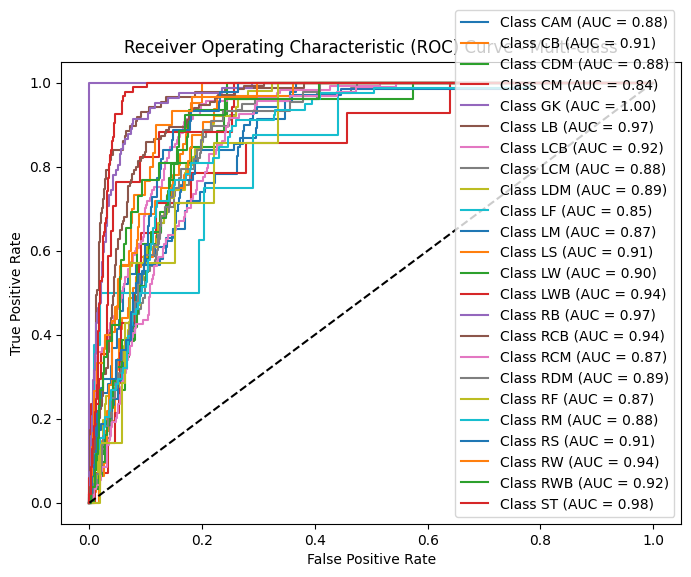

In [201]:
# Make predictions on the test set with the best model
y_prob = random_search.predict_proba(X_test_no_id)

# Binarize the labels for each class
y_test_bin = label_binarize(y_test, classes=random_search.classes_)

# Calculate ROC AUC for each class
auc_scores = []
for i in range(len(random_search.classes_)):
    auc_score = roc_auc_score(y_test_bin[:, i], y_prob[:, i])
    auc_scores.append(auc_score)
    print(f"Class {random_search.classes_[i]} - AUC Score: {auc_score:.2f}")

# Micro-average ROC AUC
micro_auc = roc_auc_score(y_test_bin, y_prob, average='micro')
print(f"Micro-average AUC Score: {micro_auc:.2f}")

# Macro-average ROC AUC
macro_auc = roc_auc_score(y_test_bin, y_prob, average='macro')
print(f"Macro-average AUC Score: {macro_auc:.2f}")

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(random_search.classes_)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {random_search.classes_[i]} (AUC = {auc_scores[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multi-class')
plt.legend(loc='lower right')
plt.show()

In [202]:
# Make predictions on the test set using the best model
test_predictions = random_search.predict(df_t)
##WE CAN REMOVE

In [204]:
# Flatten the list and join the elements
flattened_list = ["".join(item) for item in test_predictions]

print(flattened_list)

# Create a DataFrame for submission
test_predictions_submit = pd.DataFrame({"id": df_test_id["id"], "position": flattened_list})
##WE CAN REMOVE

['RB', 'LCB', 'ST', 'CAM', 'RM', 'GK', 'RB', 'RDM', 'RCB', 'RCB', 'ST', 'CAM', 'GK', 'LB', 'RCB', 'RCB', 'LCM', 'LB', 'ST', 'RB', 'RCM', 'RM', 'ST', 'RCM', 'RB', 'RCB', 'LB', 'LCM', 'GK', 'RB', 'LB', 'GK', 'RM', 'GK', 'RCB', 'RM', 'GK', 'RCB', 'LCM', 'GK', 'RCB', 'RCM', 'LB', 'RCB', 'GK', 'RCM', 'ST', 'RCB', 'RB', 'LB', 'RCB', 'GK', 'RCM', 'LB', 'ST', 'LM', 'ST', 'RB', 'RB', 'GK', 'LB', 'ST', 'LB', 'LM', 'ST', 'GK', 'RCB', 'CAM', 'CAM', 'RCM', 'GK', 'RB', 'RCB', 'RCB', 'ST', 'RCM', 'LCM', 'LCB', 'RCB', 'RB', 'RCM', 'RDM', 'CAM', 'GK', 'RCB', 'GK', 'GK', 'LM', 'RS', 'RCM', 'RB', 'CAM', 'RCB', 'LM', 'RCB', 'LB', 'RCB', 'RCM', 'ST', 'LM', 'RB', 'RM', 'RCM', 'LM', 'GK', 'RCB', 'GK', 'ST', 'ST', 'LCB', 'RM', 'ST', 'RCB', 'LB', 'LCM', 'LCM', 'RCB', 'GK', 'LM', 'ST', 'LCB', 'RM', 'RB', 'ST', 'GK', 'LCM', 'RCB', 'RCB', 'LB', 'ST', 'RB', 'LCB', 'GK', 'LB', 'RCB', 'ST', 'GK', 'RB', 'LCB', 'LCM', 'GK', 'RM', 'GK', 'RCM', 'RB', 'ST', 'GK', 'RCM', 'RB', 'LCM', 'RM', 'GK', 'LM', 'ST', 'RCM', 'LB', '

In [197]:
# Save the submission DataFrame to a CSV file
test_predictions_submit.to_csv("test_predictions_submit.csv", index=False)
##WE CAN REMOVE 

## Random Forest

In [329]:
###FINAL MODEL 
# CAN DROP NOTES 
# Comments here are from TA session
# n_estimators - 5-100
# max_depth - none - 10
# min_samples_split - minimum number of observations in the nod - 2 or around that (small, may overfit)
# min_samples_leaf - number of leafs on the tree, 1 - if more will be overfitting
# max_features - 'auto' - if it's not auto we will choose different features for different trees
# class_weights - 'balanced'

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize a random forest classifier
rf_classifier = RandomForestClassifier(random_state=1)

# Create the GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_rf_classifier = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Best Parameters:", accuracy)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy with Best Parameters: 0.4474256707759246


In [330]:
# Calculate all evaluation metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Weighted Precision:", precision)
print("Weighted Recall:", recall)
print("Weighted F1 Score:", f1)

Weighted Precision: 0.35913358922865773
Weighted Recall: 0.4474256707759246
Weighted F1 Score: 0.38367546033270883


c:\Users\bakwe\my_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Class CAM - AUC Score: 0.90
Class CB - AUC Score: 0.92
Class CDM - AUC Score: 0.88
Class CM - AUC Score: 0.82
Class GK - AUC Score: 1.00
Class LB - AUC Score: 0.97
Class LCB - AUC Score: 0.92
Class LCM - AUC Score: 0.88
Class LDM - AUC Score: 0.89
Class LF - AUC Score: 0.86
Class LM - AUC Score: 0.87
Class LS - AUC Score: 0.91
Class LW - AUC Score: 0.90
Class LWB - AUC Score: 0.94
Class RB - AUC Score: 0.96
Class RCB - AUC Score: 0.94
Class RCM - AUC Score: 0.87
Class RDM - AUC Score: 0.89
Class RF - AUC Score: 0.87
Class RM - AUC Score: 0.88
Class RS - AUC Score: 0.92
Class RW - AUC Score: 0.93
Class RWB - AUC Score: 0.92
Class ST - AUC Score: 0.98
Micro-average AUC Score: 0.94
Macro-average AUC Score: 0.91


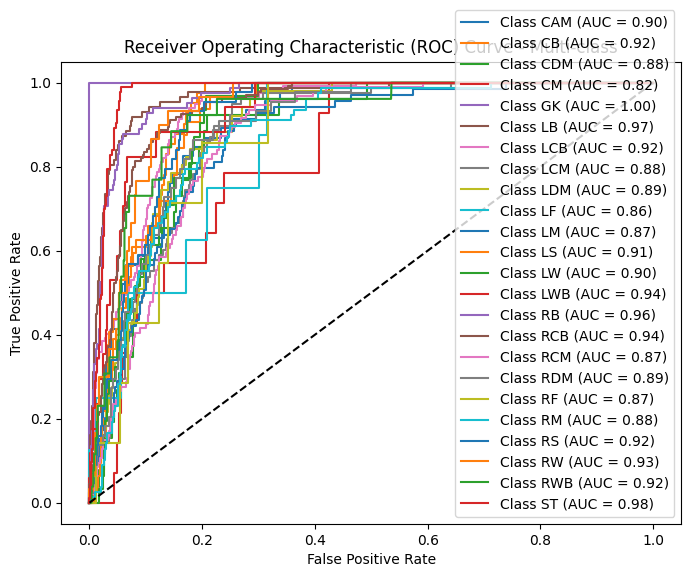

In [331]:
# Predict probabilities for each class
y_prob = best_rf_classifier.predict_proba(X_test)

# Binarize the labels for each class
y_test_bin = label_binarize(y_test, classes=best_rf_classifier.classes_)

# Calculate ROC AUC for each class
auc_scores = []
for i in range(len(best_rf_classifier.classes_)):
    auc_score = roc_auc_score(y_test_bin[:, i], y_prob[:, i])
    auc_scores.append(auc_score)
    print(f"Class {best_rf_classifier.classes_[i]} - AUC Score: {auc_score:.2f}")

# Micro-average ROC AUC
micro_auc = roc_auc_score(y_test_bin, y_prob, average='micro')
print(f"Micro-average AUC Score: {micro_auc:.2f}")

# Macro-average ROC AUC
macro_auc = roc_auc_score(y_test_bin, y_prob, average='macro')
print(f"Macro-average AUC Score: {macro_auc:.2f}")

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(best_rf_classifier.classes_)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {best_rf_classifier.classes_[i]} (AUC = {auc_scores[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multi-class')
plt.legend(loc='lower right')
plt.show()

Feature Importances:
attacking_heading_accuracy: 0.033517042788110525
attacking_crossing: 0.027357095759008555
defending_sliding_tackle: 0.02609358741830901
mentality_positioning: 0.02472096076456059
defending: 0.02377963246509286
attacking_finishing: 0.022372204846473696
mentality_interceptions: 0.02179858252615165
goalkeeping_diving: 0.02118132987579768
power_strength: 0.020169121792160558
mentality_vision: 0.020023589815704023
goalkeeping_positioning: 0.01995101106669322
defending_standing_tackle: 0.01992634725944536
skill_dribbling: 0.019519068535532934
defending_marking_awareness: 0.01950199981862013
movement_sprint_speed: 0.018926543743578803
goalkeeping_kicking: 0.01875147539898088
shooting: 0.018695263887555415
preferred_foot_Right: 0.018524994319866435
attacking_volleys: 0.018406789923113613
power_long_shots: 0.018272716318205297
movement_acceleration: 0.01814821063159621
goalkeeping_reflexes: 0.018081250518239306
power_stamina: 0.017950498097289797
skill_fk_accuracy: 0.017807

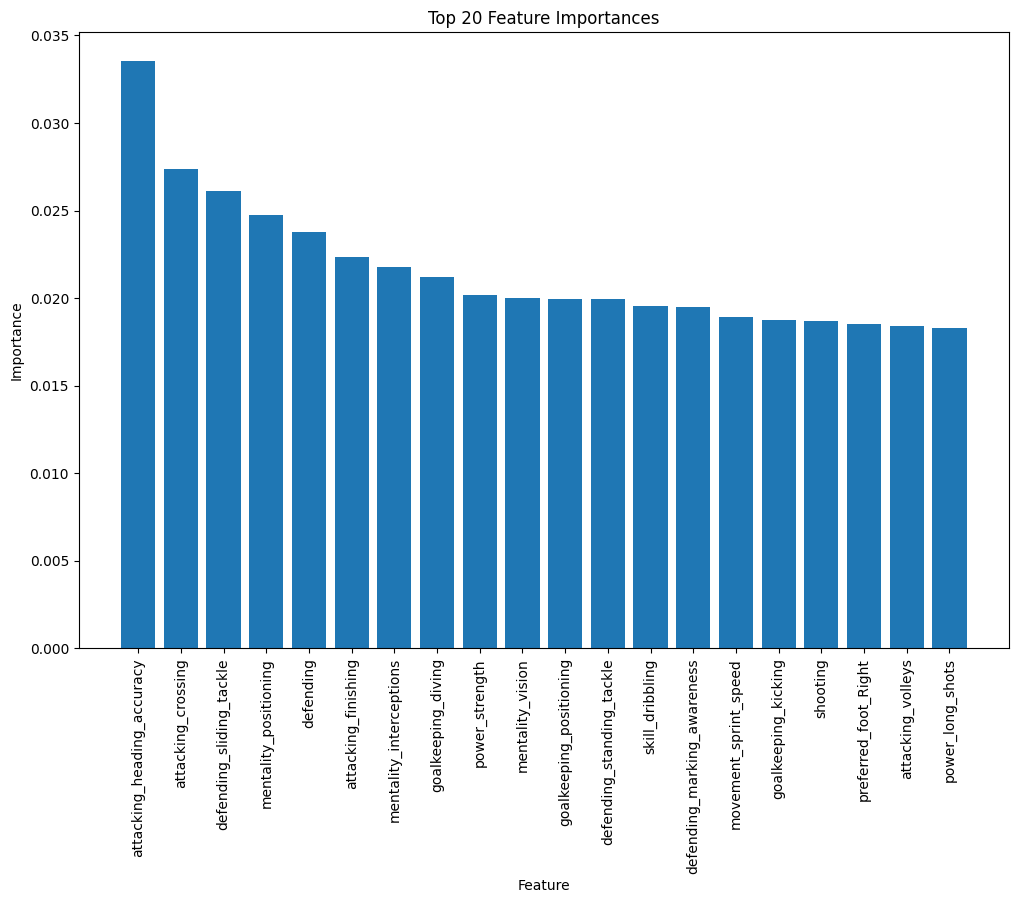

In [332]:
# Instantiate a RandomForestClassifier 
clf = RandomForestClassifier()
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Get indices that would sort the feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print feature importances
print("Feature Importances:")
for f in range(X.shape[1]):
    print(f"{X.columns[indices[f]]}: {feature_importances[indices[f]]}")

# Plot top 20 feature importances
top_n = 40
plt.figure(figsize=(12, 8))
plt.title(f"Top {top_n} Feature Importances")
plt.bar(range(top_n), feature_importances[indices[:top_n]], align="center")
plt.xticks(range(top_n), X.columns[indices[:top_n]], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

In [333]:
# Make predictions on the test set using the best model
test_predictions = best_rf_classifier.predict(df_t) 

# Produce .csv for Kaggle testing
test_predictions_submit = pd.DataFrame({"id": df_t["id"], "position": test_predictions})
test_predictions_submit.to_csv("test_predictions_submit.csv", index=False)


## XGBoost

it gives worse metrics, than Random Forest and CatBoost, don't even know, should we run it or not

In [241]:
#### WE CAN  DROP ALL XGBOOST

# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the 'position' column
df_tr['position_encoded'] = label_encoder.fit_transform(df_tr['position'])

C:\Users\bakwe\AppData\Local\Temp\ipykernel_1540\3135796667.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr['position_encoded'] = label_encoder.fit_transform(df_tr['position'])


In [242]:
df_tr = df_tr.drop(columns=['position', 'id'])

In [243]:
# Assuming 'target' is your target variable and the rest are features
X_xgb = df_tr.iloc[:, :-1]
y_xgb = df_tr.iloc[:, -1]

# Now perform the train-test split
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=99)

In [244]:

xgb_model = xgb.XGBClassifier()

params = {
    'min_child_weight': [1, 3, 5, 7, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0], 
    'max_depth': [3, 4, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1]
}

random_cv = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=params,
    cv=5,
    n_iter=5,
    scoring='roc_auc',
    n_jobs=1, 
    verbose=0, 
    return_train_score=True,
    random_state=121
)
random_cv.fit(X_train_xgb, y_train_xgb)


c:\Users\bakwe\my_env2\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\bakwe\my_env2\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\bakwe\my_env2\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "c:\Users\bakwe\my_env2\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
c:\Users\bakwe\my_env2\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 4, 5, 7, 9],
                                        'min_child_weight': [1, 3, 5, 7, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=121, return_train_score=True,
                   scoring='roc_auc')

In [245]:
random_cv.best_params_

{'subsample': 0.8,
 'min_child_weight': 3,
 'max_depth': 4,
 'learning_rate': 0.01,
 'gamma': 1.5,
 'colsample_bytree': 0.6}

In [246]:
xgb_model = xgb.XGBClassifier(
    colsample_bytree=0.6,
    gamma=1.5,
    max_depth=4,
    min_child_weight=3,
    subsample=0.8,
    learning_rate = 0.01
)

from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train_xgb
)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_xgb = sc.fit_transform(X_train_xgb)
X_test_xgb = sc.transform(X_test_xgb)
xgb_model.fit(X_train_xgb, y_train_xgb.ravel(), sample_weight=classes_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [247]:
xgb_model.score(X_train_xgb, y_train_xgb)

0.5404278462654097

In [248]:
target=xgb_model.predict(X_test_xgb)

In [249]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test_xgb, target)
print("Accuracy: %.2f%%" % (accuracy*100))

Accuracy: 37.06%


In [250]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_xgb, target)

In [251]:
cmd_obj=ConfusionMatrixDisplay(cm)

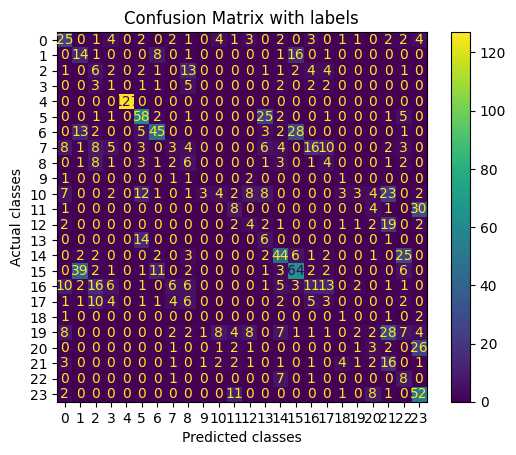

In [252]:
cmd_obj.plot()

cmd_obj.ax_.set(
    title='Confusion Matrix with labels',
    xlabel = 'Predicted classes',
    ylabel = 'Actual classes'
)
plt.show()

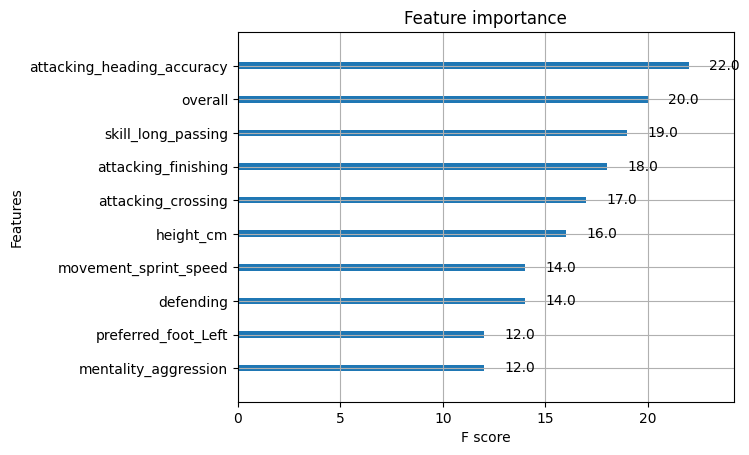

In [253]:
# Convert DataFrame columns to a list for feature_names
feature_names = X_xgb.columns.tolist()

# Create the DMatrix with feature names converted to a list
dtrain = xgb.DMatrix(X_xgb, label=y_xgb, feature_names=feature_names)

# Define your parameters for xgboost
params = {
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=10)

# Plot feature importance for the top 5 features
ax = xgb.plot_importance(model, max_num_features=10)

# Show the plot
plt.show()